CSV file that contains the following information in each row:
game_id - typically year_home_away, not always accurate
game_type - type of game -- SB(SuperBowl), CON(Conference), DIV(Divisional), WC(WildCard), REG(Regular Season)
week - week in the season, type double
gameday - date of game, YYYY-MM-DD
weekday - day of week, type string
gametime - time of day, 00:00 - 23:59
away_team - team name, abbreviated, type string
away_score - away team score, type double
home_team - team name, abbreviated, type string
home_score - home team score, type double
location - at home or neutral site -- 'Home' or 'Neutral'
result - home_score - away_score, type double
total - home_score + away_score, type double
overtime - 1(yes), 0(no)
old_game_id - idk 
gsis - idk
nfl_detail_id - idk
pfr - idk
pff - idk
espn - idk
away_moneyline - idk
home_moneyline - idk
away_rest - days of rest, type int
home_rest - days of rest, type int
spread_line - spread of score
total_line - line for total score
div_game - 1(yes), 0(no)
roof - 'closed','dome',nan,'open','outdoors'),
surface - 'a_turf','astroplay','astroturf','dessograss','fieldturf','fieldturf','grass','matrixturf','sportturf'
temp - degrees fahrenheit
wind - mph
away_qb_id - 
away_qb_name - 
away_coach - 
home_qb_id - 
home_qb_name
home_coach - 
referee - 
stadium_id - 
stadium - 

In [1]:
import pandas as pd
import csv
import matplotlib
import datetime as dt
import matplotlib.pyplot as plt
# reads in csv file - has data from upcoming season that hasn't occurred yet, will keep in df2
df = pd.read_csv('nfl.csv')
df2 = df
# reverse order of csv
df = df.iloc[::-1]
# removes 272 rows, so that df contains completed games data
n = 272
df = df.iloc[n:,:]
df = df.iloc[::-1]
# df
df = df.drop(columns = ['old_game_id','gsis','nfl_detail_id','pfr','pff','espn'])
teams = ['CIN', 'SEA', 'KC', 'PHI', 'LAC', 'GB', 'SF', 
         'CHI', 'NO', 'DEN', 'NYJ', 'BUF', 'OAK', 'ATL', 
         'TEN', 'ARI', 'CAR', 'DET', 'IND', 'TB', 'LV', 
         'DAL', 'MIN', 'STL', 'HOU', 'NE', 'JAX', 'CLE', 
         'WAS', 'PIT', 'MIA', 'LA', 'BAL', 'SD', 'NYG']

afc_north = ['BAL','BEN','CLE','PIT']
afc_east = ['BUF','MIA','NE','NYJ']
afc_south = ['HOU','IND','TEN','JAX']
afc_west = ['DEN','KC','LV','LAC']
nfc_north = ['CHI','DET','GB','MIN']
nfc_east = ['DAL','NYG','PHI','WAS']
nfc_south = ['ATL','CAR','NO','TB']
nfc_west = ['ARI','LA','SF','SEA']
# df

In [2]:
# PRE: paramters df, value, ascend must be valid
# POST: --
# returns a dataframe sorted by desired category
def sorting(df,value,ascend):
    return df.sort_values(by = [value], ascending = ascend)

In [3]:
def get_team_games(df,team):
    df2 = df[df['away_team'].str.contains(team)]
    df3 = df[df['home_team'].str.contains(team)]
    df4 = df[df['result'] > 0]
    frames = [df2, df3]
    result = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    result2 = sorting(result,'gameday',False)
    return result2
get_team_games(df,'NE')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
196,2021_19_NE_BUF,2021,WC,19,2022-01-15,Saturday,20:15,NE,17.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
195,2021_18_NE_MIA,2021,REG,18,2022-01-09,Sunday,16:25,NE,24.0,MIA,...,NaN,00-0036972,00-0036212,Mac Jones,Tua Tagovailoa,Bill Belichick,Brian Flores,NaN,MIA00,Hard Rock Stadium
410,2021_17_JAX_NE,2021,REG,17,2022-01-02,Sunday,13:00,JAX,10.0,NE,...,NaN,00-0036971,00-0036972,Trevor Lawrence,Mac Jones,Darrell Bevell,Bill Belichick,NaN,BOS00,Gillette Stadium
409,2021_16_BUF_NE,2021,REG,16,2021-12-26,Sunday,13:00,BUF,33.0,NE,...,NaN,00-0034857,00-0036972,Josh Allen,Mac Jones,Sean McDermott,Bill Belichick,NaN,BOS00,Gillette Stadium
194,2021_15_NE_IND,2021,REG,15,2021-12-18,Saturday,20:20,NE,17.0,IND,...,NaN,00-0036972,00-0032950,Mac Jones,Carson Wentz,Bill Belichick,Frank Reich,NaN,IND00,Lucas Oil Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1999_05_NE_KC,1999,REG,5,1999-10-10,Sunday,NaN,NE,14.0,KC,...,3.0,00-0001361,00-0006300,Drew Bledsoe,Elvis Grbac,Pete Carroll,Gunther Cunningham,Bob McElwee,KAN00,Arrowhead Stadium
1,1999_04_NE_CLE,1999,REG,4,1999-10-03,Sunday,NaN,NE,19.0,CLE,...,15.0,00-0001361,00-0003535,Drew Bledsoe,Tim Couch,Pete Carroll,Chris Palmer,Jeff Triplette,CLE00,Cleveland Browns Stadium
198,1999_03_NYG_NE,1999,REG,3,1999-09-26,Sunday,NaN,NYG,14.0,NE,...,5.0,00-0006212,00-0001361,Kent Graham,Drew Bledsoe,Jim Fassel,Pete Carroll,Walt Coleman,BOS99,Foxboro Stadium
197,1999_02_IND_NE,1999,REG,2,1999-09-19,Sunday,NaN,IND,28.0,NE,...,10.0,00-0010346,00-0001361,Peyton Manning,Drew Bledsoe,Jim Mora,Pete Carroll,Dick Hantak,BOS99,Foxboro Stadium


In [4]:
# PRE: df and team must be valid
# POST: --
# returns a dataframe of info on all the wins by the specified team
def get_team_wins(df,team):
    df2 = df[df['away_team'].str.contains(team)]
    df3 = df[df['home_team'].str.contains(team)]
    df4 = df3[df3['result'] > 0]
    df5 = df2[df2['result'] < 0]
    frames = [df4, df5]
    result = sorting(pd.concat(frames),'gameday',False).drop_duplicates().reset_index(drop=True)
    return result
#print(get_team_wins(df,'NE'))

# PRE: df and team must be valid
# POST: --
# returns a dataframe of info on all the losses by the specified team
def get_team_losses(df,team):
    df2 = df[df['away_team'].str.contains(team)]
    df3 = df[df['home_team'].str.contains(team)]
    df4 = df3[df3['result'] < 0]
    df5 = df2[df2['result'] > 0]
    frames = [df4, df5]
    result = sorting(pd.concat(frames),'gameday',False).drop_duplicates().reset_index(drop=True)
    return result
get_team_losses(df,'NE')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,2021_19_NE_BUF,2021,WC,19,2022-01-15,Saturday,20:15,NE,17.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
1,2021_18_NE_MIA,2021,REG,18,2022-01-09,Sunday,16:25,NE,24.0,MIA,...,NaN,00-0036972,00-0036212,Mac Jones,Tua Tagovailoa,Bill Belichick,Brian Flores,NaN,MIA00,Hard Rock Stadium
2,2021_16_BUF_NE,2021,REG,16,2021-12-26,Sunday,13:00,BUF,33.0,NE,...,NaN,00-0034857,00-0036972,Josh Allen,Mac Jones,Sean McDermott,Bill Belichick,NaN,BOS00,Gillette Stadium
3,2021_15_NE_IND,2021,REG,15,2021-12-18,Saturday,20:20,NE,17.0,IND,...,NaN,00-0036972,00-0032950,Mac Jones,Carson Wentz,Bill Belichick,Frank Reich,NaN,IND00,Lucas Oil Stadium
4,2021_06_DAL_NE,2021,REG,6,2021-10-17,Sunday,16:25,DAL,35.0,NE,...,NaN,00-0033077,00-0036972,Dak Prescott,Mac Jones,Mike McCarthy,Bill Belichick,NaN,BOS00,Gillette Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1999_12_NE_BUF,1999,REG,12,1999-11-28,Sunday,NaN,NE,7.0,BUF,...,17.0,00-0001361,00-0005363,Drew Bledsoe,Doug Flutie,Pete Carroll,Wade Phillips,Ed Hochuli,BUF00,Ralph Wilson Stadium
115,1999_11_NE_MIA,1999,REG,11,1999-11-21,Sunday,NaN,NE,17.0,MIA,...,8.0,00-0001361,00-0007835,Drew Bledsoe,Damon Huard,Pete Carroll,Jimmy Johnson,Ron Blum,MIA00,Pro Player Stadium
116,1999_10_NYJ_NE,1999,REG,10,1999-11-15,Monday,NaN,NYJ,24.0,NE,...,30.0,00-0010137,00-0001361,Ray Lucas,Drew Bledsoe,Bill Parcells,Pete Carroll,Bernie Kukar,BOS99,Foxboro Stadium
117,1999_06_MIA_NE,1999,REG,6,1999-10-17,Sunday,NaN,MIA,31.0,NE,...,5.0,00-0010379,00-0001361,Dan Marino,Drew Bledsoe,Jimmy Johnson,Pete Carroll,Ed Hochuli,BOS99,Foxboro Stadium


In [5]:
# PRE: df and 2 team parameters must be valid
# POST: --
# returns a dataframe of all the head to head matchups between the 2 specified teams
def get_head_to_head(df,team1,team2):
    df2 = df[df['away_team'].str.contains(team1)]
    df4 = df2[df2['home_team'].str.contains(team2)]
    df3 = df[df['home_team'].str.contains(team1)]
    df5 = df3[df3['away_team'].str.contains(team2)]
    
    frames = [df5,df4]
    combine = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    result = sorting(pd.concat(frames),'gameday',False)
    return result
get_head_to_head(df,'NE','BUF')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6125,2021_19_NE_BUF,2021,WC,19,2022-01-15,Saturday,20:15,NE,17.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
6084,2021_16_BUF_NE,2021,REG,16,2021-12-26,Sunday,13:00,BUF,33.0,NE,...,NaN,00-0034857,00-0036972,Josh Allen,Mac Jones,Sean McDermott,Bill Belichick,NaN,BOS00,Gillette Stadium
6045,2021_13_NE_BUF,2021,REG,13,2021-12-06,Monday,20:15,NE,14.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
5822,2020_16_BUF_NE,2020,REG,16,2020-12-28,Monday,20:15,BUF,38.0,NE,...,4.0,00-0034857,00-0027939,Josh Allen,Cam Newton,Sean McDermott,Bill Belichick,Ronald Torbert,BOS00,Gillette Stadium
5690,2020_08_NE_BUF,2020,REG,8,2020-11-01,Sunday,13:00,NE,21.0,BUF,...,17.0,00-0027939,00-0034857,Cam Newton,Josh Allen,Bill Belichick,Sean McDermott,Clete Blakeman,BUF00,New Era Field
5541,2019_16_BUF_NE,2019,REG,16,2019-12-21,Saturday,16:30,BUF,17.0,NE,...,2.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,John Hussey,BOS00,Gillette Stadium
5367,2019_04_NE_BUF,2019,REG,4,2019-09-29,Sunday,13:00,NE,16.0,BUF,...,10.0,00-0019596,00-0034857,Tom Brady,Josh Allen,Bill Belichick,Sean McDermott,Craig Wrolstad,BUF00,New Era Field
5281,2018_16_BUF_NE,2018,REG,16,2018-12-23,Sunday,13:00,BUF,12.0,NE,...,12.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,Shawn Smith,BOS00,Gillette Stadium
5169,2018_08_NE_BUF,2018,REG,8,2018-10-29,Monday,20:15,NE,25.0,BUF,...,16.0,00-0019596,00-0023645,Tom Brady,Derek Anderson,Bill Belichick,Sean McDermott,Jerome Boger,BUF00,New Era Field
5012,2017_16_BUF_NE,2017,REG,16,2017-12-24,Sunday,13:00,BUF,16.0,NE,...,7.0,00-0028118,00-0019596,Tyrod Taylor,Tom Brady,Sean McDermott,Bill Belichick,Craig Wrolstad,BOS00,Gillette Stadium


In [6]:
# PRE: df and 2 specified teams must be valid
# POST: --
# returns a dataframe of all the head to head matches that the first parameter team won
def get_head_to_head_wins(df,team_win,team_lose):
    df2 = get_head_to_head(df,team_win,team_lose)
    away = df2[df2['away_team'] == team_win]
    df3 = away[away['result'] < 0]
    home = df2[df2['home_team'] == team_win]
    df4 = home[home['result'] > 0]
    frames = [df3,df4]
    result = sorting(pd.concat(frames),'gameday',False).drop_duplicates().reset_index(drop=True)
    return result
get_head_to_head_wins(df,'NE','BUF')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,2021_13_NE_BUF,2021,REG,13,2021-12-06,Monday,20:15,NE,14.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
1,2019_16_BUF_NE,2019,REG,16,2019-12-21,Saturday,16:30,BUF,17.0,NE,...,2.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,John Hussey,BOS00,Gillette Stadium
2,2019_04_NE_BUF,2019,REG,4,2019-09-29,Sunday,13:00,NE,16.0,BUF,...,10.0,00-0019596,00-0034857,Tom Brady,Josh Allen,Bill Belichick,Sean McDermott,Craig Wrolstad,BUF00,New Era Field
3,2018_16_BUF_NE,2018,REG,16,2018-12-23,Sunday,13:00,BUF,12.0,NE,...,12.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,Shawn Smith,BOS00,Gillette Stadium
4,2018_08_NE_BUF,2018,REG,8,2018-10-29,Monday,20:15,NE,25.0,BUF,...,16.0,00-0019596,00-0023645,Tom Brady,Derek Anderson,Bill Belichick,Sean McDermott,Jerome Boger,BUF00,New Era Field
5,2017_16_BUF_NE,2017,REG,16,2017-12-24,Sunday,13:00,BUF,16.0,NE,...,7.0,00-0028118,00-0019596,Tyrod Taylor,Tom Brady,Sean McDermott,Bill Belichick,Craig Wrolstad,BOS00,Gillette Stadium
6,2017_13_NE_BUF,2017,REG,13,2017-12-03,Sunday,13:00,NE,23.0,BUF,...,13.0,00-0019596,00-0028118,Tom Brady,Tyrod Taylor,Bill Belichick,Sean McDermott,Gene Steratore,BUF00,New Era Field
7,2016_08_NE_BUF,2016,REG,8,2016-10-30,Sunday,13:00,NE,41.0,BUF,...,9.0,00-0019596,00-0028118,Tom Brady,Tyrod Taylor,Bill Belichick,Rex Ryan,John Parry,BUF00,New Era Field
8,2015_11_BUF_NE,2015,REG,11,2015-11-23,Monday,20:30,BUF,13.0,NE,...,8.0,00-0028118,00-0019596,Tyrod Taylor,Tom Brady,Rex Ryan,Bill Belichick,Gene Steratore,BOS00,Gillette Stadium
9,2015_02_NE_BUF,2015,REG,2,2015-09-20,Sunday,13:00,NE,40.0,BUF,...,7.0,00-0019596,00-0028118,Tom Brady,Tyrod Taylor,Bill Belichick,Rex Ryan,Ron Torbert,BUF00,Ralph Wilson Stadium


In [7]:
# PRE: df and 2 specified teams must be valid
# POST: --
# returns 
def rest_leadto_win(df,team1,team2):
    df2 = df[df['home_rest'] >= df['away_rest']]
    df3 = df2[df2['result'] > 0]
    df4 = df[df['home_rest'] < df['away_rest']]
    df5 = df4[df4['result'] < 0]
    frames = [df3,df5]
    return sorting(pd.concat(frames),'gameday',False).drop_duplicates().reset_index(drop=True)
    
rest_leadto_win(get_head_to_head(df,'NE','BUF'),'NE','BUF')

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,2021_19_NE_BUF,2021,WC,19,2022-01-15,Saturday,20:15,NE,17.0,BUF,...,NaN,00-0036972,00-0034857,Mac Jones,Josh Allen,Bill Belichick,Sean McDermott,NaN,BUF00,New Era Field
1,2020_16_BUF_NE,2020,REG,16,2020-12-28,Monday,20:15,BUF,38.0,NE,...,4.0,00-0034857,00-0027939,Josh Allen,Cam Newton,Sean McDermott,Bill Belichick,Ronald Torbert,BOS00,Gillette Stadium
2,2020_08_NE_BUF,2020,REG,8,2020-11-01,Sunday,13:00,NE,21.0,BUF,...,17.0,00-0027939,00-0034857,Cam Newton,Josh Allen,Bill Belichick,Sean McDermott,Clete Blakeman,BUF00,New Era Field
3,2019_16_BUF_NE,2019,REG,16,2019-12-21,Saturday,16:30,BUF,17.0,NE,...,2.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,John Hussey,BOS00,Gillette Stadium
4,2018_16_BUF_NE,2018,REG,16,2018-12-23,Sunday,13:00,BUF,12.0,NE,...,12.0,00-0034857,00-0019596,Josh Allen,Tom Brady,Sean McDermott,Bill Belichick,Shawn Smith,BOS00,Gillette Stadium
5,2017_16_BUF_NE,2017,REG,16,2017-12-24,Sunday,13:00,BUF,16.0,NE,...,7.0,00-0028118,00-0019596,Tyrod Taylor,Tom Brady,Sean McDermott,Bill Belichick,Craig Wrolstad,BOS00,Gillette Stadium
6,2015_02_NE_BUF,2015,REG,2,2015-09-20,Sunday,13:00,NE,40.0,BUF,...,7.0,00-0019596,00-0028118,Tom Brady,Tyrod Taylor,Bill Belichick,Rex Ryan,Ron Torbert,BUF00,Ralph Wilson Stadium
7,2013_17_BUF_NE,2013,REG,17,2013-12-29,Sunday,16:25,BUF,20.0,NE,...,8.0,00-0027253,00-0019596,Thaddeus Lewis,Tom Brady,Doug Marrone,Bill Belichick,Ed Hochuli,BOS00,Gillette Stadium
8,2012_10_BUF_NE,2012,REG,10,2012-11-11,Sunday,13:00,BUF,31.0,NE,...,12.0,00-0023682,00-0019596,Ryan Fitzpatrick,Tom Brady,Chan Gailey,Bill Belichick,Bill Leavy,BOS00,Gillette Stadium
9,2011_17_BUF_NE,2011,REG,17,2012-01-01,Sunday,13:00,BUF,21.0,NE,...,5.0,00-0023682,00-0019596,Ryan Fitzpatrick,Tom Brady,Chan Gailey,Bill Belichick,Bill Leavy,BOS00,Gillette Stadium


In [8]:
# PRE: df and the 2 specified teams must be valid
# POST: -- 
# returns a dict of the game win differentials, time of the game, the rest of the winning team, 
# whether the winning team was home or away, and the rest of the losing team for both teams
# dict: (team : differential, gameday, win rest, home/away of winning team, lose rest)
def win_differentials(df,team1,team2):
    df2 = get_head_to_head_wins(df,team1,team2)
    df3 = get_head_to_head_wins(df,team2,team1)
    lst1 = []
    lst2 = []
    for index, row in df2.iterrows():
        if row['away_team'] == team1:
            lst1.append([row['result'],row['gameday'],row['away_rest'],'Away',row['home_rest']])
        else:
            lst1.append([row['result'],row['gameday'],row['home_rest'],'Home',row['away_rest']])

    for index, row in df3.iterrows():
        if row['away_team'] == team1:
            lst2.append([row['result'],row['gameday'],row['away_rest'],'Away',row['home_rest']])
        else:
            lst2.append([row['result'],row['gameday'],row['home_rest'],'Home',row['away_rest']])

    length1 = len(lst1)
    length2 = len(lst2)
    for index in range(length1):
        if lst1[index][0] < 0:
            lst1[index][0] = lst1[index][0] * (-1)
    for index in range(length2):
        if lst2[index][0] < 0:
            lst2[index][0] = lst2[index][0] * (-1)
    dict_games = {team1: lst1, team2: lst2}    
    return dict_games    
win_differentials(df,'NE','BUF')    

{'NE': [[4.0, '2021-12-06', 8, 'Away', 11],
  [7.0, '2019-12-21', 7, 'Home', 7],
  [6.0, '2019-09-29', 7, 'Away', 7],
  [12.0, '2018-12-23', 7, 'Home', 7],
  [19.0, '2018-10-29', 8, 'Away', 8],
  [21.0, '2017-12-24', 7, 'Home', 7],
  [20.0, '2017-12-03', 7, 'Away', 7],
  [16.0, '2016-10-30', 7, 'Away', 7],
  [7.0, '2015-11-23', 8, 'Home', 11],
  [8.0, '2015-09-20', 10, 'Away', 7],
  [15.0, '2014-10-12', 7, 'Away', 7],
  [14.0, '2013-12-29', 7, 'Home', 7],
  [2.0, '2013-09-08', 7, 'Away', 7],
  [6.0, '2012-11-11', 14, 'Home', 7],
  [24.0, '2012-09-30', 7, 'Away', 7],
  [28.0, '2012-01-01', 8, 'Home', 8],
  [31.0, '2010-12-26', 7, 'Away', 7],
  [8.0, '2010-09-26', 7, 'Home', 7],
  [7.0, '2009-12-20', 7, 'Away', 7],
  [1.0, '2009-09-14', 7, 'Home', 7],
  [13.0, '2008-12-28', 7, 'Away', 7],
  [10.0, '2008-11-09', 7, 'Home', 7],
  [46.0, '2007-11-18', 14, 'Away', 7],
  [31.0, '2007-09-23', 7, 'Home', 7],
  [22.0, '2006-10-22', 14, 'Away', 7],
  [2.0, '2006-09-10', 7, 'Home', 7],
  [28.0, '2

In [9]:
def overall_win_lose_tie(df,team):
    df2 = df[df['away_team'] == team]
    df3 = df[df['home_team'] == team]
    frames = [df2,df3]
    df4 = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    arr = []
    for index, row in df4.iterrows():
        if row['away_team'] == team:
            if row['result'] < 0:
                arr.append('W')
            elif row['result'] > 0:
                arr.append('L')
            else:
                arr.append('T')
    for index, row in df4.iterrows():
        if row['home_team'] == team:
            if row['result'] > 0:
                arr.append('W')
            elif row['result'] < 0:
                arr.append('L')
            else:
                arr.append('T')
    df4['W/L/T'] = arr
    return sorting(df4,'gameday',False)
wins_season(df,'NE')

NameError: name 'wins_season' is not defined

In [10]:
def record_per_given_time(df,team,time):
    WLT = [0,0,0]
    df2 = overall_win_lose_tie(df,team)
    for index, row in df2.iterrows():
        for index2 in range(len(time)):
            if row['season'] == time[index2]:
                if row['W/L/T'] == 'W':
                    WLT[0] = WLT[0] + 1
                elif row['W/L/T'] == 'L':
                    WLT[1] = WLT[1] + 1
                elif row['W/L/T'] == 'D':
                    WLT[2] = WLT[2] + 1
    return WLT
print(record_per_given_time(df,'NE',[2017,2018,2019,2020,2021]))
#print(record_per_given_time(df,'NE',[2018]))
#print(record_per_given_time(df,'NE',[2019]))
#print(record_per_given_time(df,'NE',[2020]))
#print(record_per_given_time(df,'NE',[2021]))

[58, 31, 0]


In [11]:
def record_against_team(df,team1,team2,time):
    df2 = overall_win_lose_tie(df,team1)
    df3 = df2[df2['away_team'] == team1]
    df4 = df3[df3['home_team'] == team2]
    df5 = df2[df2['away_team'] == team2]
    df6 = df5[df5['home_team'] == team1]
    frames = [df4,df6]
    df7 = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    arr1 = record_per_given_time(df7,team1,time)
    arr2 = record_per_given_time(df7,team2,time)
    return {team1:arr1,team2:arr2}
print(record_against_team(df,'NE','BUF',[2021]))

{'NE': [1, 2, 0], 'BUF': [2, 1, 0]}


<module 'matplotlib.pyplot' from '/Users/sambitsahoo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

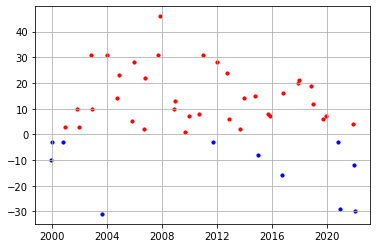

In [12]:
# PRE: df and 2 specified teams must be valid
# POST: --
# returns a scatterplot, team 1 wins red, and team 2 wins in blue
def scatterplot_differentials(df,team1,team2):
    dates1 = []
    dates2 = []
    scores1 = []
    scores2 = []
    x = win_differentials(df,team1,team2)
    
    for y in x[team1]:
        dates1.append(y[1])
        scores1.append(y[0])
    for y in x[team2]:
        dates2.append(y[1])
        scores2.append(y[0]*(-1))
    
    date1 = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates1]  
    date2 = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates2]  
    #return df.plot.scatter(x='date', y='scores')
    plt.scatter(date1, scores1, c = 'red',s=10)
    plt.scatter(date2, scores2, c = 'blue',s=10)
    plt.grid(True)
    return plt

scatterplot_differentials(df,'NE','BUF')

In [13]:
df.describe()

,season,week,away_score,home_score,result,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,temp,wind
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,4156.000000,4156.000000,6137.000000,4156.000000,4156.000000,6137.000000,4153.000000,4153.000000,6137.000000,4365.000000,4365.000000
mean,2010.074629,9.533160,20.889686,23.236761,2.347075,44.126446,0.061431,7.483298,7.521916,88.150385,-133.568335,2.361414,-50.198508,-50.276227,43.438977,-65.082832,-76.278353,0.381620,58.269874,8.493013
std,6.635065,5.289185,10.123684,10.364707,14.721406,14.251752,0.240138,1.981767,2.091740,290.682765,331.008320,5.975018,95.092592,95.163570,5.010637,83.287928,74.069013,0.485824,16.900638,5.399465
min,1999.000000,1.000000,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,-137.000000,-146.000000,30.000000,-125.000000,-125.000000,0.000000,-6.000000,0.000000
25%,2004.000000,5.000000,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-145.000000,-277.000000,-3.000000,-110.000000,-110.000000,40.000000,-108.000000,-109.000000,0.000000,46.000000,5.000000
50%,2010.000000,10.000000,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,144.000000,-158.000000,3.000000,-105.000000,-105.000000,43.500000,-105.000000,-105.000000,0.000000,59.000000,8.000000
75%,2016.000000,14.000000,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,247.250000,131.000000,6.500000,100.000000,100.000000,47.000000,-101.000000,-102.000000,1.000000,71.000000,11.000000
max,2021.000000,22.000000,59.000000,62.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,138.000000,126.000000,63.500000,113.000000,113.000000,1.000000,109.000000,71.000000


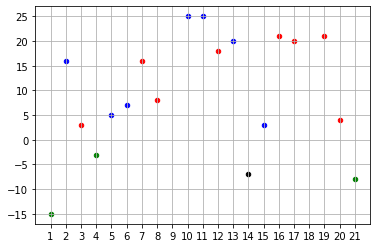

In [14]:
# PRE: df, specified team, and season must be valid
# POST: --
# returns a scatterplot, red is away, and blue is home for the specified season
def scatterplot_season(df,team,season):
    win_home = []
    weeks1 = []
    win_away = []
    weeks2 = []
    lose_home = []
    weeks3 = []
    lose_away = []
    weeks4 = []
    df2 = df[((df['home_team'] == team) | (df['away_team'] == team)) & (df['season'] == season)]
    for index,row in df2.iterrows():
        if row['home_team'] == team:
            if row['result'] > 0:
                win_home.append(row['result'])
                weeks1.append(row['week'])
            elif row['result'] < 0:
                lose_home.append(row['result'])
                weeks3.append(row['week'])
        elif row['away_team'] == team:
            if row['result'] > 0:
                lose_away.append(row['result'] * -1)
                weeks4.append(row['week'])
            elif row['result'] < 0:
                win_away.append(row['result'] * -1)
                weeks2.append(row['week'])
    plt.scatter(weeks1,win_home, c = 'red',s=20)
    plt.scatter(weeks2, win_away, c = 'blue',s=20)
    plt.scatter(weeks3,lose_home, c = 'green',s=20)
    plt.scatter(weeks4,lose_away, c = 'black',s=20)
    plt.grid(True)
    plt.xticks(range(1, 22))       
        
scatterplot_season(df,'NE',2017)

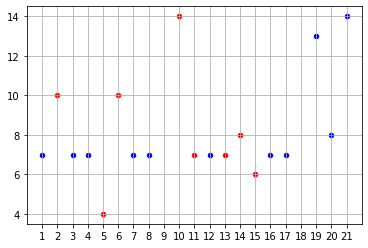

In [15]:
def scatterplot_rest(df,team,season):
    df2 = df[df['season'] == season]
    rest_home = []
    weeks1 = []
    weeks2 = []
    rest_away = []
    df3 = df2[df2['home_team'] == team]
    df4 = df2[df2['away_team'] == team]
    
    for index,row in df3.iterrows():
        rest_home.append(row['home_rest'])
        weeks1.append(row['week'])
    for index,row in df4.iterrows():
        rest_away.append(row['away_rest'])
        weeks2.append(row['week'])
    plt.scatter(weeks2,rest_away, c = 'red',s=20)
    plt.scatter(weeks1, rest_home, c = 'blue',s=20)
    plt.grid(True)
    plt.xticks(range(1, 22))
    
scatterplot_rest(df,'NE',2017)

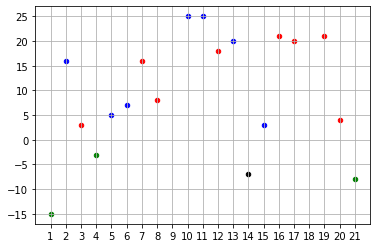

In [16]:
def quarterback_wins(df,qb,season):
    win_home = []
    weeks1 = []
    win_away = []
    weeks2 = []
    lose_home = []
    weeks3 = []
    lose_away = []
    weeks4 = []
    df2 = df[((df['home_qb_name'] == qb) | (df['away_qb_name'] == qb)) & (df['season'] == season)]
    for index,row in df2.iterrows():
        if row['home_qb_name'] == qb:
            if row['result'] > 0:
                win_home.append(row['result'])
                weeks1.append(row['week'])
            elif row['result'] < 0:
                lose_home.append(row['result'])
                weeks3.append(row['week'])
        elif row['away_qb_name'] == qb:
            if row['result'] > 0:
                lose_away.append(row['result'] * -1)
                weeks4.append(row['week'])
            elif row['result'] < 0:
                win_away.append(row['result'] * -1)
                weeks2.append(row['week'])
    plt.scatter(weeks1,win_home, c = 'red',s=20)
    plt.scatter(weeks2, win_away, c = 'blue',s=20)
    plt.scatter(weeks3,lose_home, c = 'green',s=20)
    plt.scatter(weeks4,lose_away, c = 'black',s=20)
    plt.grid(True)
    plt.xticks(range(1, 22))       
        
quarterback_wins(df,'Tom Brady',2017)

In [18]:
def b2b_away(df,team,season):
    df2 = df[(df['season'] == season) & (df['away_team'] == team)]
    df2 = df2.reset_index()
    prev = df2.iloc[0]
    df_final = pd.DataFrame(columns = ['week','result'])
    for index,row in df2.iterrows():
        if index == 0:
            continue
        if row['week'] == (prev['week']+1):
            df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
            df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
        prev = row
    df_final = df_final.drop_duplicates()

    return df_final
b2b_away(df,'NE',2016)
# 5,6,10,11,13,14,15

/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipyke

,week,result
0,8.0,3.0
1,9.0,18.0
2,18.0,-9.0
3,19.0,-30.0


In [19]:
b2b_away(df,'NE',2017)


/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipyke

,week,result
0,5.0,5.0
1,6.0,7.0
2,10.0,25.0
3,11.0,25.0
4,13.0,20.0
5,14.0,-7.0
7,15.0,3.0


In [20]:
b2b_away(df,'NE',2018)


/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipyke

,week,result
0,2.0,-11.0
1,3.0,-16.0
2,7.0,7.0
3,8.0,19.0
4,14.0,-1.0
5,15.0,-7.0
6,20.0,6.0
7,21.0,10.0


In [21]:
b2b_away(df,'NE',2019)

/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)


,week,result
0,4.0,6.0
1,5.0,26.0


In [22]:
b2b_away(df,'NE',2020)


/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipyke

,week,result
0,8.0,-3.0
1,9.0,3.0
2,13.0,45.0
3,14.0,-21.0
5,15.0,-10.0


In [23]:
b2b_away(df,'NE',2021)

/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': row['week'],'result': row['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipykernel_6640/3865430392.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'week': prev['week'],'result': prev['result']*-1},ignore_index = True)
/var/folders/g9/3zmbx09j2f3_lk08rlk4615m0000gn/T/ipyke

,week,result
0,8.0,3.0
1,9.0,18.0
2,18.0,-9.0
3,19.0,-30.0
